In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2
# Tải dữ liệu MNIST và chia thành tập huấn luyện và tập kiểm tra
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu và chuyển đổi nhãn thành one-hot encoding
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [2]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [3]:
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)


In [14]:
class env:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    def penalty(self,predictLable,indexInTrainLable):
        trueLable =  np.argmax( self.train_labels[indexInTrainLable] )
        if predictLable == trueLable:
            penalty = 1
        else: penalty = 100
        return penalty,trueLable
    def action(self,act,index):
        return self.penalty(act,index)
class agent:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.learning_rate = 1e-8
        self.env = env(self.train_images,self.train_labels)
        self.w = np.zeros([10,784])
    def predict(self,image,training="No"):
        # image = image.reshape(1,784)
        if training == "Yes":
            w = self.w
        else: w = self.w_max
        min = np.linalg.norm(w[0,:]-image)
        index =0
        for i in range(10):
            min1=np.linalg.norm(w[i,:]-image)
            if min>min1:
                index = i
                min = min1
        return index
    def update_w(self):
        count = 0
        for i in range(self.train_images.shape[0]):
            action = self.predict(self.train_images[i],training="Yes")
            penalty, trueLable = self.env.action(action,i)
            if penalty == 1:
                self.w[action,:] =  self.w[action,:]+self.train_images[i]*self.learning_rate*penalty
                count +=1
            else: 
                self.w[trueLable,:]= self.w[trueLable,:] +  self.train_images[i]*self.learning_rate*penalty
                self.w[action,:]= self.w[action,:] -  self.train_images[i]*self.learning_rate*penalty
                for i in range(10):
                    if i!=trueLable and i !=action:
                        self.w[i,:]= self.w[i,:] -  self.train_images[i]*self.learning_rate*0.001
        return self.w,count
    def train(self):
        self.w_max,max_count = self.update_w()
        print("===================>",max_count)
        for i in range(30):
            w ,count = self.update_w()
            print("===================>",count)
            if max_count<count:
                max_count=count
                self.w_max = w
            elif self.learning_rate>= 1e-10 : self.learning_rate -=0.2*self.learning_rate
            # if max_count - count >50:
            #     break
        return self.w_max
    def evaluate(self,set_images,set_labels):
        number =0
        for i in range(set_images.shape[0]):
            image = set_images[i]
            label = np.argmax(set_labels[i])
            predicted_label= self.predict(image) 
            if predicted_label == label: number+=1
        print(number)
        print((float(number / set_images.shape[0]))*100)


In [15]:
ag = agent(train_images,train_labels)
w=ag.train()

===================> 51869
===================> 53449
===================> 53786
===================> 54040
===================> 54133
===================> 54242
===================> 54329
===================> 54343
===================> 54416
===================> 54474
===================> 54512
===================> 54528
===================> 54543
===================> 54534
===================> 54926
===================> 54816
===================> 54945
===================> 54977
===================> 54945
===================> 55131
===================> 55084
===================> 55179
===================> 55172
===================> 55294
===================> 55284
===================> 55375
===================> 55341
===================> 55417
===================> 55390
===================> 55471
===================> 55465


In [16]:
ag.evaluate(test_images,test_labels)

9063
90.63


9


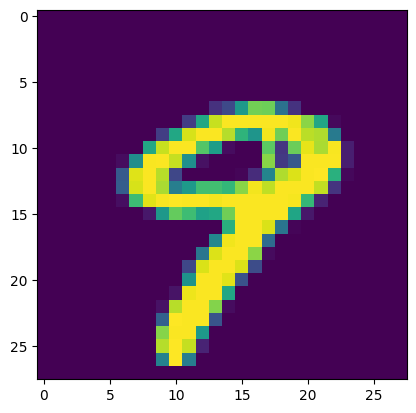

In [19]:
i =9
label = ag.predict(test_images[i])
print(label)
plt.imshow(test_images[i].reshape(28,28))
plt.show()